# Apple Quality Classification Project

## Introduction
This project aims to classify apples into two quality categories: good and bad. By analyzing various properties of apples, such as size, weight, sweetness, crunchiness, juiciness, ripeness, and acidity, I develop a machine learning model that can predict the quality of an apple. This classification could be beneficial for agricultural producers, retailers, and consumers to ensure quality control and optimize the supply chain.

## Objectives
- To explore and visualize the dataset to gain insights into the distribution and relationships of the features.
- To preprocess the data for machine learning model training.
- To learn more about the logistic regression model. 
- To optimize the log model by adjusting the decision threshold for a balanced precision-recall trade-off.

## Dataset Overview
The dataset, `apple_quality.csv`, contains several features related to the properties of apples, with each row representing a unique apple sample. The 'Quality' column, which we aim to predict, labels each apple as 'good' or 'bad' based on these features.

## Methodology
We will use the following steps in our analysis:
1. Data Loading and Preparation: Load the data and convert categorical variables into a suitable format for analysis.
2. Data Exploration and Visualization: Use statistical summaries and visualizations to understand the data better.
3. Preprocessing: Split the dataset into features and labels, and further into training and testing sets.
4. Model Training and Evaluation: Train multiple models and evaluate them based on accuracy, precision, recall, and F1-score.
5. Model Optimization: Adjust the decision threshold to achieve the best balance between precision and recall.
6. Conclusion: Summarize the findings and suggest the best model and configurations for classifying apple quality.

Let's dive into the analysis and see how we can use machine learning to classify apple quality!

## Step 1: Data Loading and Preparation

Firstly we import the nessceary libraries for the whole project.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

We can now import our data and start having a look, at what we're dealing with

In [6]:
# Load the dataset
data_path = "apple_quality.csv"  # Make sure to update this path if needed
data = pd.read_csv(data_path)

# Map 'Quality' from 'good'/'bad' to 1/0
data["Quality"] = data["Quality"].map({'good': 1, 'bad': 0})

# Display the first few rows of the data
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


## Step 2: Data Exploration and Visualization

After seeing that the data works correctly and the mapping of quality, we can now work on exploring the data and visualizing it.


In [7]:
# General Statistics
print(data.describe())

# Check for missing values
print("\nMissing values by column:\n", data.isnull().sum())

              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity      Quality  
count  4000.000000  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877     0.501000  
std       1.930286     1.874427     2.110270     0.500062  
min      -5.961897    -5.864599    -7.010538     0.000000  
25%      -0.801286    -0.771677  

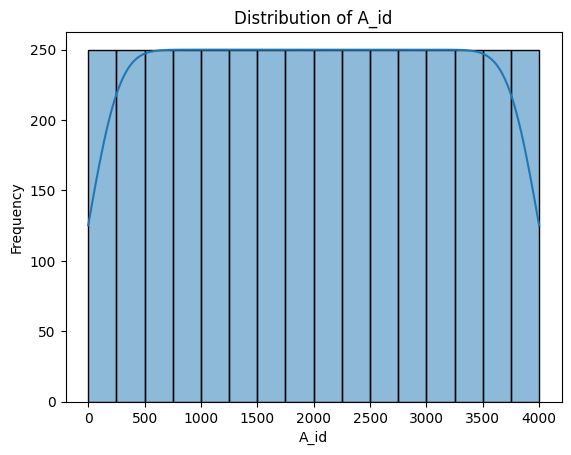

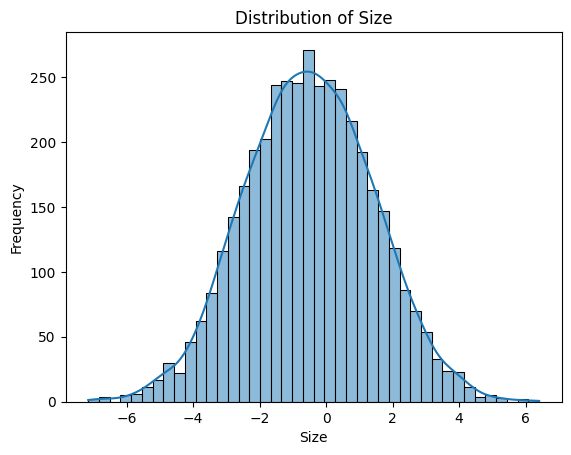

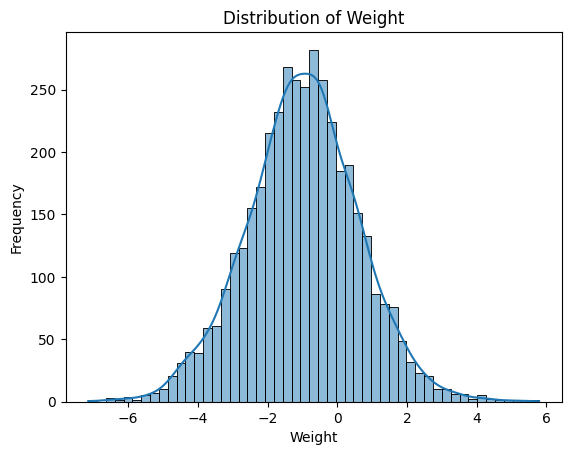

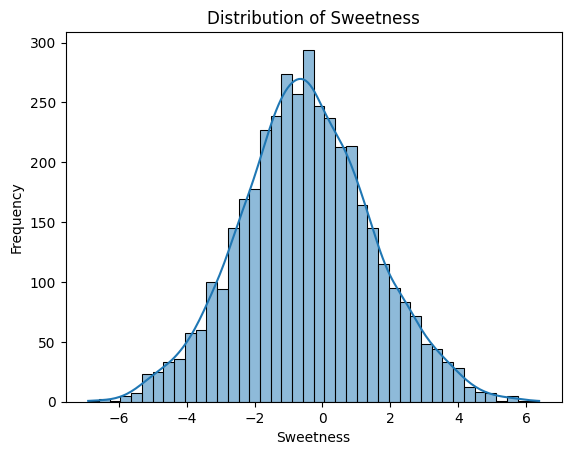

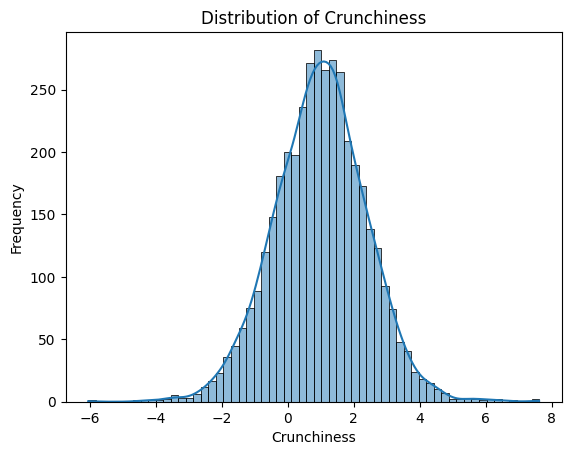

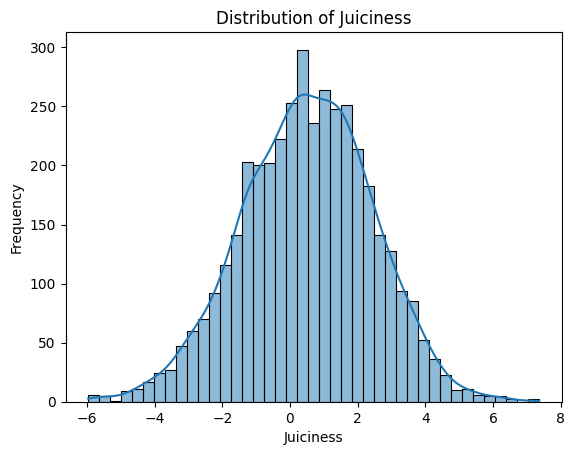

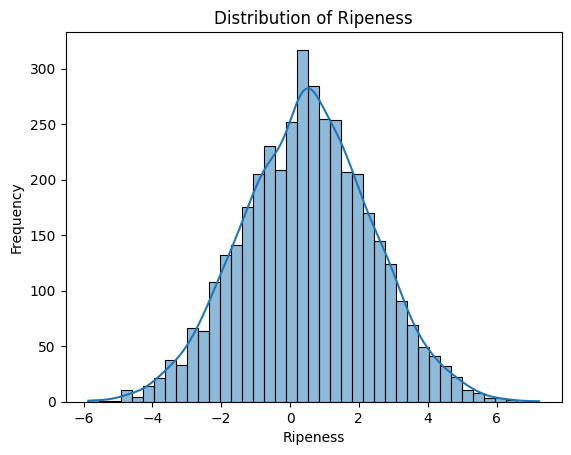

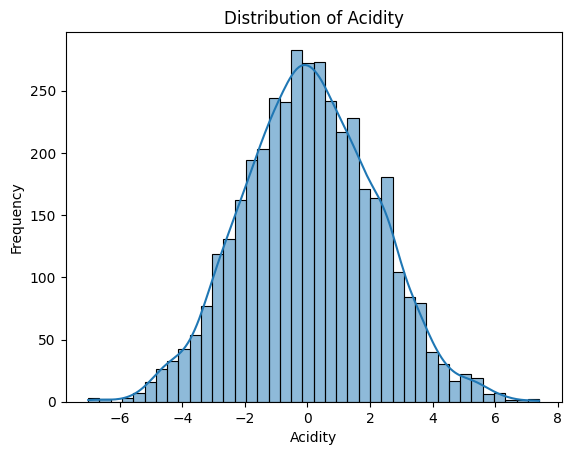

In [8]:
# Visualization of feature distributions
def histogram_data(data):
    # Iterate over each column in the DataFrame
    for column in data.columns[:-1]:  # Excluding the 'Quality' column
        # Plotting histograms for numerical columns
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Plotting histograms for all features
histogram_data(data)

# Key Points from the histograms

All the features in the dataset shows a normal distribution, which seems to indicate that the data dataset is well distributed all around. The normal distributions is often an assumption for many statistical models and machine learning algorithms.

There are no significant outliers or missing data in any of the distributions, which is good for model training as it reduces the need for outlier handling or imputation.

The normal distribution across most features suggests that the dataset may not require extensive preprocessing before being used to train machine learning models.

## Step 3: Preprocessing

We will now split the data into a training set and testing set. So we that we can test the model on unseen data from that point we can measure the capability of the model. 

In [9]:
# Preprocessing the dataset
X = data.drop(["Quality"], axis=1) # Dropping our target variable from the data we are investigating
y = data["Quality"] # Setting our target/dependant variable

# Splitting the dataset into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Step 4: Model training

Since this project is only for me to better understand the logistic regression model, I will not be testing multiple models for comparison. This is purely for learning more about the logistic regression model.


In [22]:
# Creating the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Making predictions using the default threshold of 0.5
default_predictions = log_model.predict(X_test)
print(classification_report(y_test, default_predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       393
           1       0.78      0.77      0.78       407

    accuracy                           0.78       800
   macro avg       0.77      0.78      0.77       800
weighted avg       0.78      0.78      0.78       800



In [24]:
# Creating a confusion matrix for the default model
cm_default = confusion_matrix(y_test, default_predictions)
print("Confusion Matrix (Default Threshold):")
print(cm_default)

Confusion Matrix (Default Threshold):
[[305  88]
 [ 92 315]]


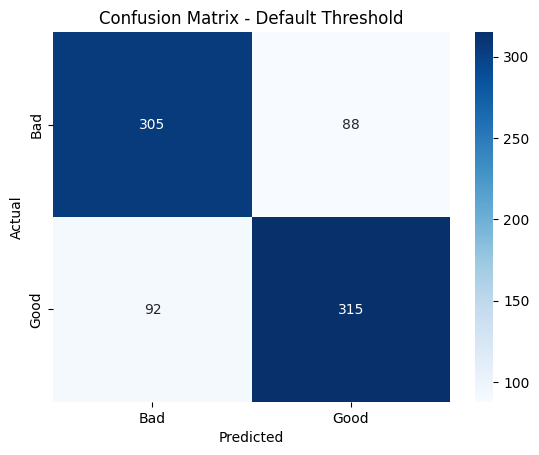

In [25]:
# Optional: Plot the confusion matrix
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - Default Threshold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Evaluation of the first log_model
The log model shows quite a good result, but I think we can do something better with the log_model for a potential client.

Let's say that the client does not want a single bad apple to go out, then we should make the model able to detect all the bad apples, even if some of the good apples go to waste. It really all depends on the goal of the client, but in this hypothetical example, I want no bad apples to be sent out.

In [30]:
# Adjusting the threshold for the logistic model. 
# [:, 1] Slicing the Matrix for only positive class
# Second column [1] contains the probabilities of each instance being in class 1... = good apples
probabilities = log_model.predict_proba(X_test)[:, 1]

# From the probabilities we now find the precision, recall and thresholds
# We view the threshold as a cut-off point to decide whether a probability score should be classified as 1 or 0
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

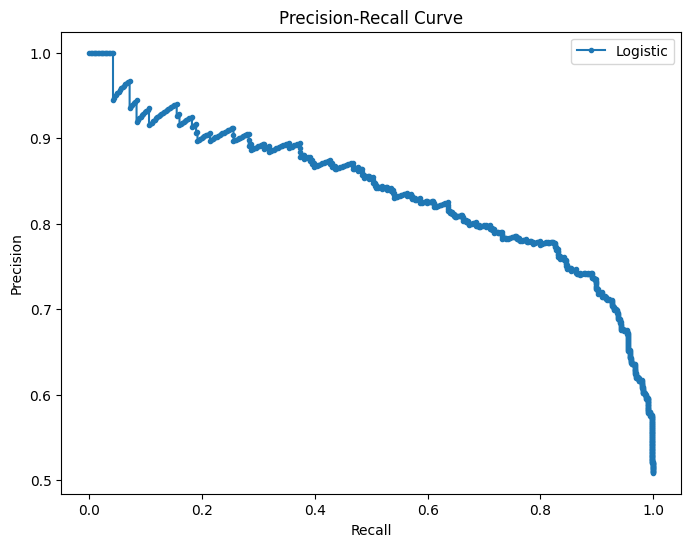

In [31]:
# We look at the precision recall curve, to look at for further analysis.
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Recall or Precision?

Our objective is to ensure that no bad apples are sent out in production.
Which means we want as many true positives as possible and as few false positives as possible. In this case we would opt for a higher recall, since it aims to catch as many bad apples as possible. It might also mislabel some good apples as bad, which would be a waste of resources, so it's balancing game.

For our example we will not care about wasted resources, we care only about getting good apples out, so we go for 'Recall/Sensitivity'


In [48]:
# On the graph I found a point I believe is good. Values are Recall: 0.909, Precision: 0.7355
# Now we find the best threshold to uphold these values.
# Find the index of the closest recall value to our desired recall
closest_recall_index = np.argmin(np.abs(recall - 1))
print(closest_recall_index)

0


In [49]:
# The index would be: 0, which we now use to find the corresponding closet precision and threshhold
closest_precision = precision[closest_recall_index]
closest_threshold = thresholds[closest_recall_index - 1]  # thresholds is one element shorter than precision and recall
print(f"Closest Recall: {recall[closest_recall_index]}, Closest Precision: {closest_precision}, Threshold: {closest_threshold}")


Closest Recall: 1.0, Closest Precision: 0.50875, Threshold: 0.9834932800789675


In [50]:
# We now make our adjusted predictions and compare the results
adjusted_predictions = (probabilities >= closest_threshold).astype(int)
print(classification_report(y_test, adjusted_predictions))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       393
           1       1.00      0.00      0.00       407

    accuracy                           0.49       800
   macro avg       0.75      0.50      0.33       800
weighted avg       0.75      0.49      0.33       800



Confusion Matrix (Adjusted Threshold: 0.9834932800789675):
[[393   0]
 [406   1]]


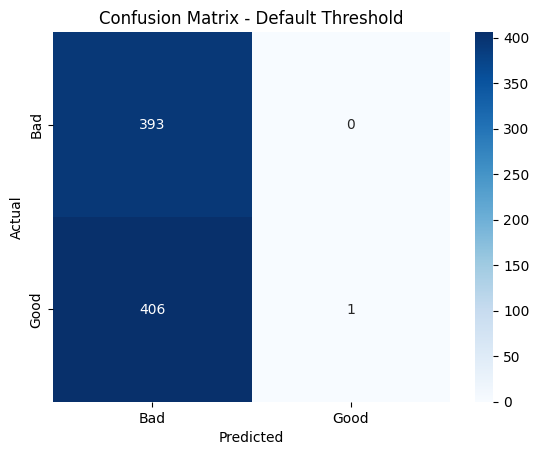

In [51]:
# Creating a confusion matrix for the adjusted model
cm_adjusted = confusion_matrix(y_test, adjusted_predictions)
print(f"Confusion Matrix (Adjusted Threshold: {closest_threshold}):")
print(cm_adjusted)
# Optional: Plot the confusion matrix
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - Default Threshold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Results and Conclusion.

So from the confusion matrix we find that our model is very good at predicting the bad apples, but we waste all most all good apples, which does not help our client. Therefore a threshold of: 0.983, is not optimal. So we could continue tweaking the model for a better result, but the main point was for me to learn more about the logistic regression, recall, precision and much more. I went well, ofc the model could be better, but i could just choose another model, like Decision Tree and get a better model, but that is not the point.

## Example of decision tree, no tweaking.


In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
dt_default_predictions = clf.predict(X_test)
print(classification_report(y_test, dt_default_predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       393
           1       0.80      0.81      0.81       407

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800

